### Identifying emerging customer segments using K-means (k-means++) Clustering

Here in this problem, we will use unsupervised ML model to group customers into segments and in-turm help business by suggesting segment based line of businesses.

Dataset that we will use is Wholesale customers data from https://www.kaggle.com/code/jcaminha/k-means-dataset/data

#### Importing dataset

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r'\Wholesale customers data.csv')

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


All the features will be used as all are some form of customer features

In [11]:
X = data.iloc[:, :].values

In [12]:
X

array([[    2,     3, 12669, ...,   214,  2674,  1338],
       [    2,     3,  7057, ...,  1762,  3293,  1776],
       [    2,     3,  6353, ...,  2405,  3516,  7844],
       ...,
       [    2,     3, 14531, ...,   437, 14841,  1867],
       [    1,     3, 10290, ...,  1038,   168,  2125],
       [    1,     3,  2787, ...,    65,   477,    52]], dtype=int64)

#### Selecting the K value by elbow method

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


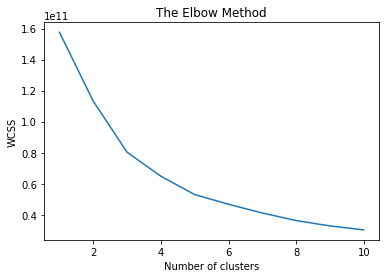

In [26]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Selecting K  as 5 because the sharp defline of WCSS almost ceases at around 5

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

Combining predicted groups to dataset

In [21]:
data_segmented = pd.concat([data,pd.DataFrame(y_kmeans, columns= ['Group'])], axis=1, join='inner')
data_segmented.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,1
7,2,3,7579,4956,9426,1669,3321,2566,1
8,1,3,5963,3648,6192,425,1716,750,1
9,2,3,6006,11093,18881,1159,7425,2098,4


#### Plotting the means

<AxesSubplot:xlabel='Group'>

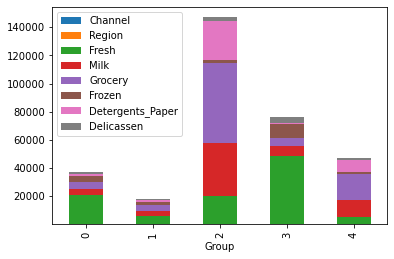

In [24]:
data_segmented.groupby("Group").aggregate("mean").plot.bar(stacked=True)

#### Identifying and creating segment names or lines of businesses

* Group 0: Fresh customers but low spenders
* Group 1: Low spenders
* Group 2: High spenders
* Group 3: Fresh customers but high spenders
* Group 4: Dairy and Frozen products customers